In [1]:
# Run some setup code for this notebook.
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
#Import utils functions from PCA madule
from utils.preprocess_with_pca import perform_pca, project_data, backproject_data, compute_error, classify_with_pca_models, evaluate_pca_model
#Import utils functions from LDA madule
from utils.preprocess_with_lda import standardize_data, lda_basis, project_data_lda, build_nn, train_nn, evaluate_lda_model
#Import utils functions from NN madule
from utils.NN import NN
#Import utils functions from autoencoder madule
from utils.auntoencoder import train_autoencoders, visualize_autoencoder_output, evaluate_performance

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# CIFAR-10 Data Loading and Preprocessing


In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'dataset/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


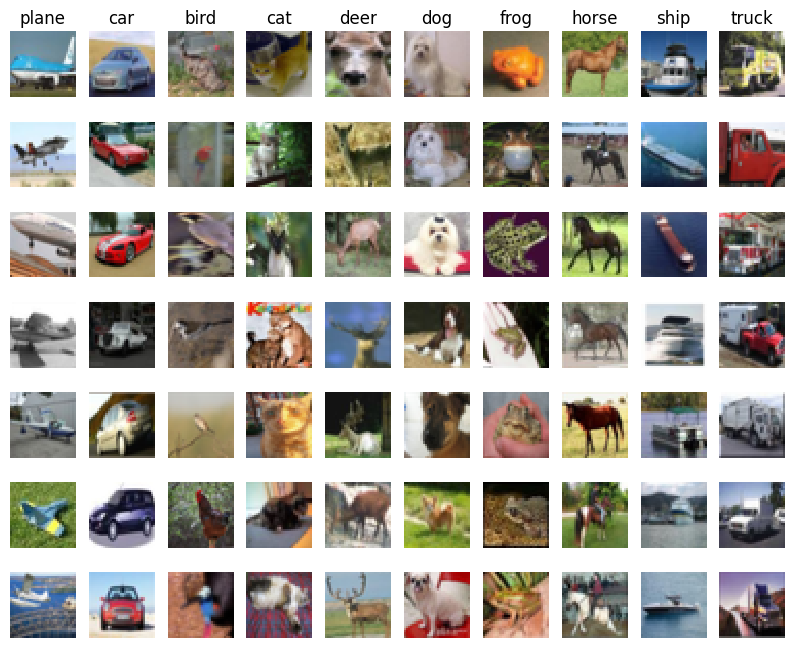

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Perform PCA
pca_models = perform_pca(X_train.reshape(-1, 3072), y_train, num_components=2)
# Project data
projected_data = project_data(pca_models, X_test.reshape(-1, 3072))
# Backproject data
backprojected_data_list = backproject_data(pca_models, projected_data)
# Compute labels using minimum error criterion
y_pred = classify_with_pca_models(pca_models, projected_data, X_test)
#Evaluate model and print metrics valuese
evaluate_pca_model(y_test, y_pred)

Saad Alam
Accuracy: 0.15
Precision: 0.18518518518518517
Recall: 0.16666666666666666
F1-Score: 0.9407407407407408

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         4
           9       0.67      1.00      0.80         2

    accuracy                           0.15        20
   macro avg       0.17      0.15      0.15        20
weighted avg       0.17      0.15      0.15        20



/home/saadalam/anaconda3/envs/Deep_Learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saadalam/anaconda3/envs/Deep_Learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saadalam/anaconda3/envs/Deep_Learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [5]:
#Lineaer Discriminator
# Standardize the data
standardize_data_X_train, standardize_data_X_test = standardize_data(X_train.reshape(-1, 3072), X_test.reshape(-1, 3072))
# Compute the LDA basis
lda, class_means = lda_basis(standardize_data_X_train, y_train, n_components=9)
# # Project the data onto the LDA space
X_train_lda = project_data_lda(lda, standardize_data_X_train, y_train, class_means)
X_test_lda = project_data_lda(lda, standardize_data_X_test, y_test, class_means)

# buil small Neural Network
obj = NN(X_train_lda, X_test_lda, y_train, y_test)
# Train small neyural network for LDA
obj.train()
#print LDA Evaluation metrics
obj.print_metrics()

Epoch 1/100, Loss: 10.1823
Epoch 2/100, Loss: 9.8207
Epoch 3/100, Loss: 9.4663
Epoch 4/100, Loss: 9.1187
Epoch 5/100, Loss: 8.7777
Epoch 6/100, Loss: 8.4433
Epoch 7/100, Loss: 8.1158
Epoch 8/100, Loss: 7.7956
Epoch 9/100, Loss: 7.4834
Epoch 10/100, Loss: 7.1798
Epoch 11/100, Loss: 6.8856
Epoch 12/100, Loss: 6.6014
Epoch 13/100, Loss: 6.3279
Epoch 14/100, Loss: 6.0656
Epoch 15/100, Loss: 5.8146
Epoch 16/100, Loss: 5.5752
Epoch 17/100, Loss: 5.3473
Epoch 18/100, Loss: 5.1308
Epoch 19/100, Loss: 4.9255
Epoch 20/100, Loss: 4.7313
Epoch 21/100, Loss: 4.5480
Epoch 22/100, Loss: 4.3754
Epoch 23/100, Loss: 4.2131
Epoch 24/100, Loss: 4.0611
Epoch 25/100, Loss: 3.9187
Epoch 26/100, Loss: 3.7857
Epoch 27/100, Loss: 3.6613
Epoch 28/100, Loss: 3.5450
Epoch 29/100, Loss: 3.4361
Epoch 30/100, Loss: 3.3339
Epoch 31/100, Loss: 3.2379
Epoch 32/100, Loss: 3.1473
Epoch 33/100, Loss: 3.0617
Epoch 34/100, Loss: 2.9804
Epoch 35/100, Loss: 2.9030
Epoch 36/100, Loss: 2.8291
Epoch 37/100, Loss: 2.7583
Epoch 38/

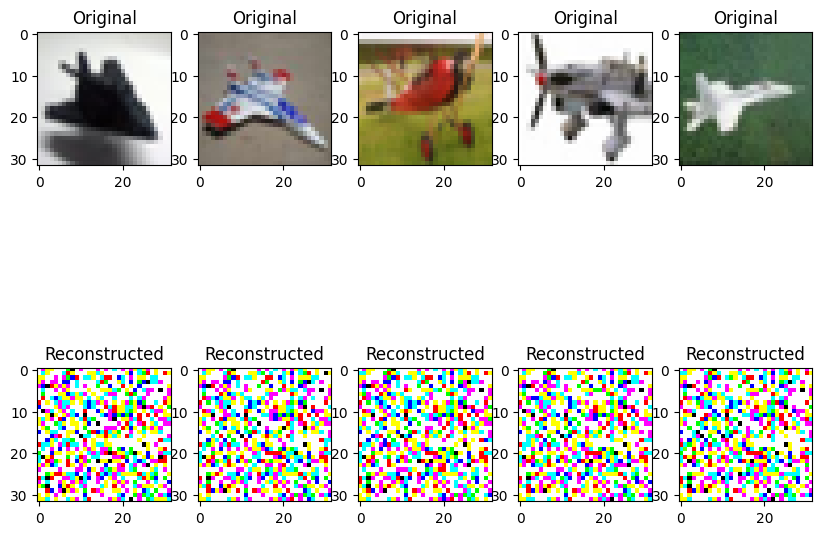

Accuracy: 0.1,
Precision: [0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
Recall: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
F1-Score: [0.0, 0.18181818181818182, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
# Flate input Data to fed Autowncoder
X_train_flate = X_train.reshape(X_train.shape[0], -1)
X_test_flate = X_test.reshape(X_test.shape[0], -1)
#train auntoencoder
import warnings

#suppress warnings
warnings.filterwarnings('ignore')
class_autoencoders = train_autoencoders(X_train_flate, y_train, hidden_size = 3072)
# Visualize autoencoder output for a specific class (e.g., class 0)
visualize_autoencoder_output(class_autoencoders[0], X_train_flate[y_train == 0][:5], 'output_images.png')
# Evaluate models' performance on the test set
metrics = evaluate_performance(X_test_flate, y_test, class_autoencoders)
#Print Metrics
print(f"Accuracy: {metrics['Accuracy']},")
print(f"Precision: {metrics['Precision']},")
print(f"Recall: {metrics['Recall']},")
print(f"F1-Score: {metrics['F1-Score']}")

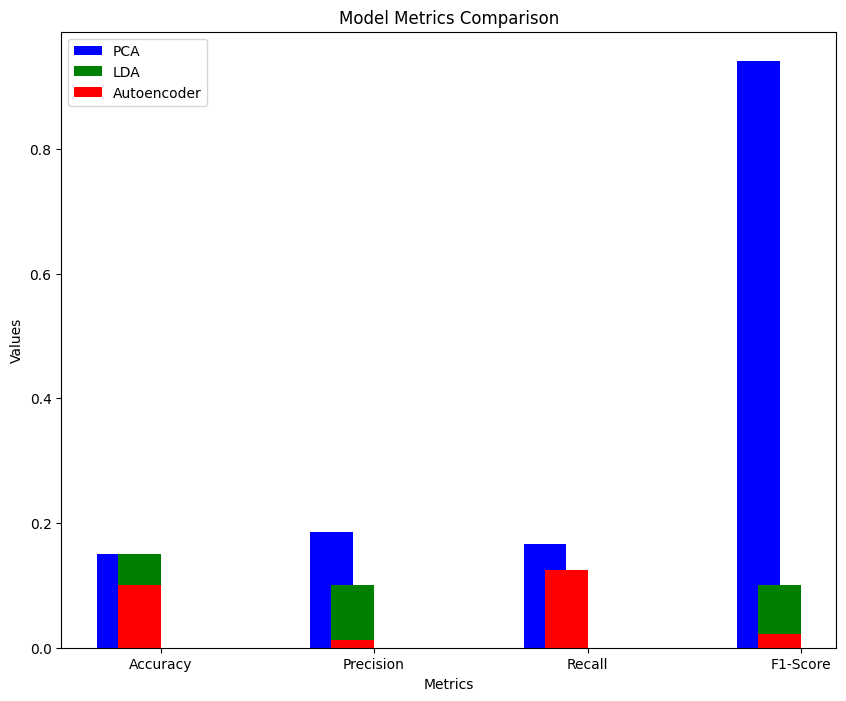

In [4]:
import matplotlib.pyplot as plt

# Metrics for PCA
pca_accuracy = 0.15
pca_precision = 0.18518518518518517
pca_recall = 0.16666666666666666
pca_f1_score = 0.9407407407407408

# Metrics for LDA
lda_accuracy = 0.15
lda_precision = 0.1
lda_recall = 0.125
lda_f1_score = 0.1

# Metrics for Autoencoder
autoencoder_accuracy = 0.1
autoencoder_precision = [0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
autoencoder_recall = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
autoencoder_f1_score = [0.0, 0.18181818181818182, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Calculate the mean of Autoencoder metrics across all classes
mean_autoencoder_precision = sum(autoencoder_precision) / len(autoencoder_precision)
mean_autoencoder_recall = sum(autoencoder_recall) / len(autoencoder_recall)
mean_autoencoder_f1_score = sum(autoencoder_f1_score) / len(autoencoder_f1_score)

# Define the metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Collect the metric values for each model
pca_metrics = [pca_accuracy, pca_precision, pca_recall, pca_f1_score]
lda_metrics = [lda_accuracy, lda_precision, lda_recall, lda_f1_score]
autoencoder_metrics = [autoencoder_accuracy, mean_autoencoder_precision, mean_autoencoder_recall, mean_autoencoder_f1_score]

# Number of models and width of bars
num_models = 3
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = range(len(metrics))

# Create a bar chart
plt.bar(index, pca_metrics, bar_width, label='PCA', color='b', align='center')
plt.bar(index, lda_metrics, bar_width, label='LDA', color='g', align='edge')
plt.bar(index, autoencoder_metrics, bar_width, label='Autoencoder', color='r', align='edge')

# Set the x-axis labels
plt.xlabel('Metrics')
plt.xticks([i + bar_width for i in index], metrics)

# Set the y-axis label
plt.ylabel('Values')

# Set the title
plt.title('Model Metrics Comparison')

# Add a legend
plt.legend()

# Display the chart
plt.show()
